# Diminos Store - Delivery Time





# Problem Statement

Kanav has started his own Pizza Store by getting the Franchise from the popular Pizza brand Diminos. 
Diminos promises to deliver the pizza order within 31 minutes from the time the order was placed. Otherwise the pizza will be free for the customer.
In order to increase the revenue and profits Kanav is running the store 24 * 7.
Recently Diminos gave a notice to Kanav that they will be measuring their stores' performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.
Kanav is worried that he might lose the franchise if he is not able to meet the metric and wants your help in order to understand his store's performance so that he can take some actions to prevent his business. 


# Importing required libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\diminos_data.csv")

In [189]:
df.shape

(15000, 3)

In [190]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


>this data is from 1st march to 27th march

>Order_delivered _at and order_placed _at  contains date time month year


giving free pizzas and customer satisfaction is important

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


>there are no null values in this dataset

>the dataset contains 15000 datapoints with three variables 

> the datatype is 2 objects and 1 int 

In [194]:
df.duplicated().sum()

0

> there are no duplicate values in this dataset

In [195]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])

df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


>Datetime argument converts the  string datatype to   appropriate datetime object

In [196]:
df['order_placed_at'].dt.day

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
53        1
54        1
55        1
56        1
57        1
58        1
59        1
60        1
61        1
62        1
63        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
73        1
74        1
75        1
76        1
77        1
78        1
79        1
80        1
81        1
82        1
83  

>it represents the day  the pizza was ordered 1 to 27 days


In [197]:
df['order_placed_at'].dt.month

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
30       3
31       3
32       3
33       3
34       3
35       3
36       3
37       3
38       3
39       3
40       3
41       3
42       3
43       3
44       3
45       3
46       3
47       3
48       3
49       3
50       3
51       3
52       3
53       3
54       3
55       3
56       3
57       3
58       3
59       3
60       3
61       3
62       3
63       3
64       3
65       3
66       3
67       3
68       3
69       3
70       3
71       3
72       3
73       3
74       3
75       3
76       3
77       3
78       3
79       3
80       3
81       3
82       3
83       3
84       3
85       3
86       3
87       3
88       3
89       3
90       3

In [198]:
df['order_placed_at'].dt.year

0        2023
1        2023
2        2023
3        2023
4        2023
5        2023
6        2023
7        2023
8        2023
9        2023
10       2023
11       2023
12       2023
13       2023
14       2023
15       2023
16       2023
17       2023
18       2023
19       2023
20       2023
21       2023
22       2023
23       2023
24       2023
25       2023
26       2023
27       2023
28       2023
29       2023
30       2023
31       2023
32       2023
33       2023
34       2023
35       2023
36       2023
37       2023
38       2023
39       2023
40       2023
41       2023
42       2023
43       2023
44       2023
45       2023
46       2023
47       2023
48       2023
49       2023
50       2023
51       2023
52       2023
53       2023
54       2023
55       2023
56       2023
57       2023
58       2023
59       2023
60       2023
61       2023
62       2023
63       2023
64       2023
65       2023
66       2023
67       2023
68       2023
69       2023
70       2023
71    

In [199]:
# Week of year
df['order_placed_at'].dt.week

C:\Users\DELL\AppData\Local\Temp\ipykernel_13472\3072188416.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['order_placed_at'].dt.week


0         9
1         9
2         9
3         9
4         9
5         9
6         9
7         9
8         9
9         9
10        9
11        9
12        9
13        9
14        9
15        9
16        9
17        9
18        9
19        9
20        9
21        9
22        9
23        9
24        9
25        9
26        9
27        9
28        9
29        9
30        9
31        9
32        9
33        9
34        9
35        9
36        9
37        9
38        9
39        9
40        9
41        9
42        9
43        9
44        9
45        9
46        9
47        9
48        9
49        9
50        9
51        9
52        9
53        9
54        9
55        9
56        9
57        9
58        9
59        9
60        9
61        9
62        9
63        9
64        9
65        9
66        9
67        9
68        9
69        9
70        9
71        9
72        9
73        9
74        9
75        9
76        9
77        9
78        9
79        9
80        9
81        9
82        9
83  

> this represents the week of the year 
> 9 represents 9th week from beginning of the year

In [200]:
# Day of Week?
df['order_placed_at'].dt.dayofweek

0        2
1        2
2        2
3        2
4        2
5        2
6        2
7        2
8        2
9        2
10       2
11       2
12       2
13       2
14       2
15       2
16       2
17       2
18       2
19       2
20       2
21       2
22       2
23       2
24       2
25       2
26       2
27       2
28       2
29       2
30       2
31       2
32       2
33       2
34       2
35       2
36       2
37       2
38       2
39       2
40       2
41       2
42       2
43       2
44       2
45       2
46       2
47       2
48       2
49       2
50       2
51       2
52       2
53       2
54       2
55       2
56       2
57       2
58       2
59       2
60       2
61       2
62       2
63       2
64       2
65       2
66       2
67       2
68       2
69       2
70       2
71       2
72       2
73       2
74       2
75       2
76       2
77       2
78       2
79       2
80       2
81       2
82       2
83       2
84       2
85       2
86       2
87       2
88       2
89       2
90       2

In [201]:
df['day_of_month'] = df['order_placed_at'].dt.day


In [202]:
df['day_of_week'] = df['order_placed_at'].dt.day_name()

<AxesSubplot:>

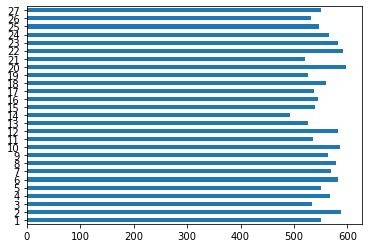

In [203]:
df['day_of_month'].value_counts().sort_index().plot(kind='barh')

>this represents total no. of orders on that particular day

<AxesSubplot:>

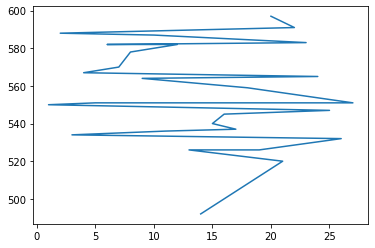

In [204]:
df['day_of_month'].value_counts().plot(kind='line')

<AxesSubplot:>

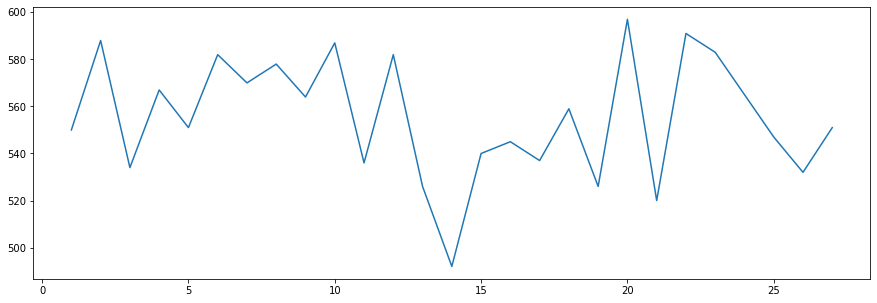

In [205]:
df['day_of_month'].value_counts().sort_index().plot(kind='line', figsize=(15, 5))

<AxesSubplot:>

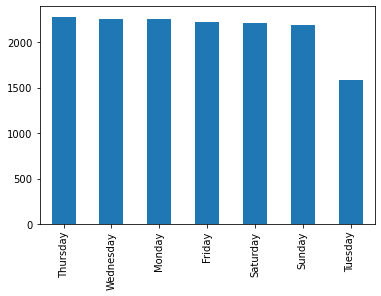

In [206]:
df['day_of_week'].value_counts().plot(kind='bar')

# Feature Engineering

In [208]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])


In [209]:
df["delivery_time"] = df["order_delivered_at"] - df["order_placed_at"]
df["delivery_time"] = df["delivery_time"]/np.timedelta64(1,"m")


>here the time difference is in minutes(np.timedelta64(1,"m"))


In [210]:
df.dtypes

order_id                       int64
order_placed_at       datetime64[ns]
order_delivered_at    datetime64[ns]
day_of_month                   int64
day_of_week                   object
delivery_time                float64
dtype: object

In [211]:
df["order_placed_date"] = df["order_placed_at"].dt.date

>order placed at in date format

In [212]:
df["order_placed_time"] = df["order_placed_at"].dt.time

>order placed at time format

In [213]:
df["order_delivered_date"] = df["order_delivered_at"].dt.date

>order delivered in date format

In [214]:
df["order_delivered_time"] = df["order_delivered_at"].dt.time

>order delivered in time foramt

In [215]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056


creating new features called time_period which  is divided into five different times in 24 hour day 

latenight,morning,afternoon,evening,night helpd in easy analysis of delivery time 

and also helps to know the most ordered time 

In [217]:
df["time_period"] = df["order_placed_at"].apply(lambda x: "late night(1am-4am)" if x.hour > 1 and x.hour<=4 else ( "morning(4am-12pm)" if x.hour > 4 and x.hour<=12 else ("Afternon(12pm-4pm)" if x.hour >12 and x.hour <=16 else   ("evening(4pm-7pm)" if x.hour >16 and x.hour <=19 else  "night(7pm-1am)"))))

In [218]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,1,Wednesday,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night(7pm-1am)
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,1,Wednesday,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night(7pm-1am)
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,1,Wednesday,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night(7pm-1am)
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,1,Wednesday,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night(7pm-1am)
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,1,Wednesday,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night(7pm-1am)


In [219]:
df["time_period"].value_counts()

morning(4am-12pm)      5002
night(7pm-1am)         3785
Afternon(12pm-4pm)     2452
evening(4pm-7pm)       1889
late night(1am-4am)    1872
Name: time_period, dtype: int64

Most of the orders are made in the morning time i.e.,5002

least orders made at latetime i.e., 1872



<AxesSubplot:xlabel='time_period', ylabel='Count'>

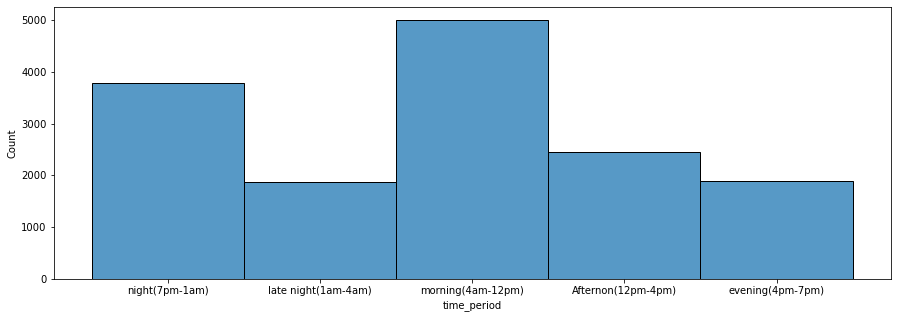

In [224]:
plt.figure(figsize=(15,5))
sns.histplot(df["time_period"])

In [225]:
#during 4am to 12pm (morning) around 5002 orders areb placed
#at night 3785 orders were placed
#afternoon 2452

dropping feature order_placed_at and order_delivered_at

In [227]:
df.drop(["order_placed_at", "order_delivered_at"],axis=1,inplace=True)

In [228]:
df.head()

,order_id,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period
0,1523111,1,Wednesday,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night(7pm-1am)
1,1523112,1,Wednesday,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night(7pm-1am)
2,1523113,1,Wednesday,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night(7pm-1am)
3,1523114,1,Wednesday,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night(7pm-1am)
4,1523115,1,Wednesday,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night(7pm-1am)


In [229]:
df.dtypes

order_id                  int64
day_of_month              int64
day_of_week              object
delivery_time           float64
order_placed_date        object
order_placed_time        object
order_delivered_date     object
order_delivered_time     object
time_period              object
dtype: object

In [230]:
df["order_placed_day"] = pd.to_datetime(df["order_placed_date"]).dt.day_name()

In [231]:
df["order_delivered_day"] = pd.to_datetime(df["order_delivered_date"]).dt.day_name()

In [232]:
df.head()

,order_id,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
0,1523111,1,Wednesday,17.140719,2023-03-01,00:00:59,2023-03-01,00:18:07.443132,night(7pm-1am),Wednesday,Wednesday
1,1523112,1,Wednesday,15.598754,2023-03-01,00:03:59,2023-03-01,00:19:34.925241,night(7pm-1am),Wednesday,Wednesday
2,1523113,1,Wednesday,15.104856,2023-03-01,00:07:22,2023-03-01,00:22:28.291385,night(7pm-1am),Wednesday,Wednesday
3,1523114,1,Wednesday,38.533657,2023-03-01,00:07:47,2023-03-01,00:46:19.019399,night(7pm-1am),Wednesday,Wednesday
4,1523115,1,Wednesday,16.176984,2023-03-01,00:09:03,2023-03-01,00:25:13.619056,night(7pm-1am),Wednesday,Wednesday


<AxesSubplot:xlabel='order_placed_day', ylabel='Count'>

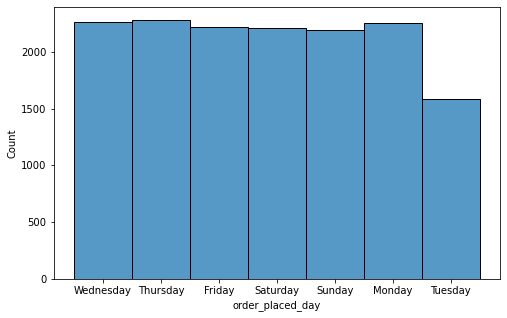

In [233]:
plt.figure(figsize=(8,5))
sns.histplot(df["order_placed_day"])

In [ ]:
#except tuesday all others days have good number of orders

In [247]:
df["delivery_time"].mean()

20.499389326467746

In [235]:
df["delivery_time"].min()

15.000010333333334

In [236]:
df["delivery_time"].max()

7299.831374933333

In [237]:
df["delivery_time"].median()

15.797986066666667

In [238]:
df["delivery_time"].quantile(0.95)

27.261043996666658

<AxesSubplot:>

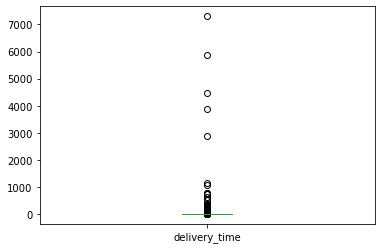

In [239]:
df['delivery_time'].plot(kind='box')

In [240]:
count= 0
for i in df["delivery_time"]:
    if i > 30.00:
        count = count +1
print(f"Out of 15k deliveries {count} deliveries are late")

Out of 15k deliveries 604 deliveries are late


In [245]:
pd.set_option("display.max.rows",None)
df[df["delivery_time"]>1440]

,order_id,day_of_month,day_of_week,delivery_time,order_placed_date,order_placed_time,order_delivered_date,order_delivered_time,time_period,order_placed_day,order_delivered_day
4165,1527276,8,Wednesday,5867.434753,2023-03-08,09:46:43,2023-03-12,11:34:09.085175,morning(4am-12pm),Wednesday,Sunday
5499,1528610,10,Friday,7299.831375,2023-03-10,17:06:22,2023-03-15,18:46:11.882496,evening(4pm-7pm),Friday,Wednesday
10007,1533118,19,Sunday,2883.124250,2023-03-19,00:56:34,2023-03-21,00:59:41.454974,night(7pm-1am),Sunday,Tuesday
10225,1533336,19,Sunday,4485.891210,2023-03-19,11:07:32,2023-03-22,13:53:25.472592,morning(4am-12pm),Sunday,Wednesday
14155,1537266,26,Sunday,3888.444088,2023-03-26,09:54:24,2023-03-29,02:42:50.645252,morning(4am-12pm),Sunday,Wednesday


# Conclusion